Load a multivariate dataset (eg. iris, wine, digits ... from sklearn.datasets). Apply Principal components analysis (PCA) to reduce its  dimensionality and analyze:

How much variance is retained with fewer components

How much PCA affects visualization and classification performance. 

In [41]:
import matplotlib.pyplot as plt
import numpy as np

In [42]:
from sklearn.datasets import load_iris
iris = load_iris()

In [43]:
X = iris.data
y = iris.target

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Training classifier on original data

In [45]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.svm import SVC

svm1 = SVC()
svm1.fit(X_train1,y_train1)

y_pred1 = svm1.predict(X_test1)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



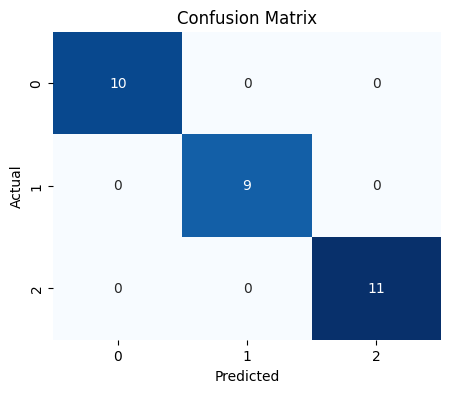

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print(f"Classification Report:\n {classification_report(y_test1, y_pred1)}")

cm = confusion_matrix(y_test1,y_pred1)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Applying PCA and Training Classifier

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

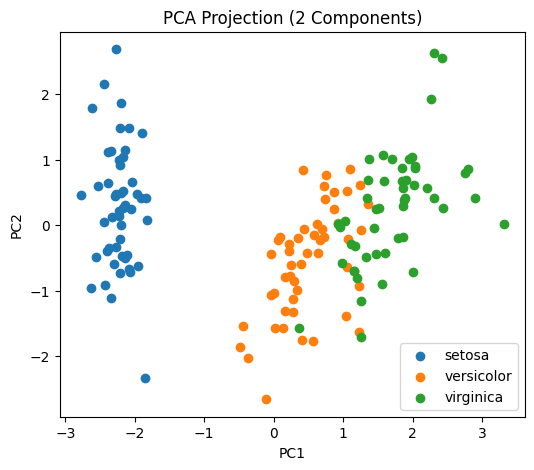

In [ ]:
plt.figure(figsize=(6,5))
for label in np.unique(y):
    plt.scatter(X_pca[y==label, 0], X_pca[y==label, 1], label=iris.target_names[label])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection (2 Components)')
plt.legend()
plt.show()

In [49]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)
print("Total variance retained:", explained_variance.sum())

Explained variance by each component: [0.72962445 0.22850762]
Total variance retained: 0.9581320720000166


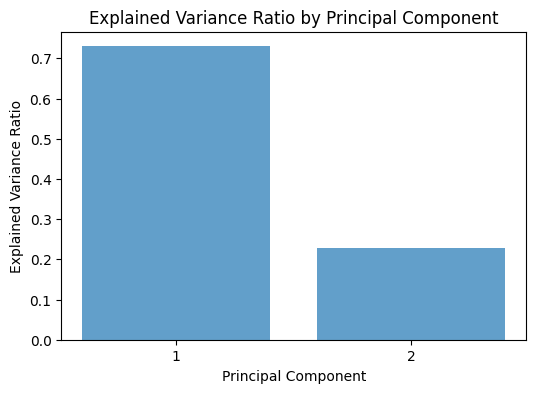

In [50]:
plt.figure(figsize=(6,4))
components = np.arange(1, len(explained_variance) + 1)
plt.bar(components, explained_variance, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks(components)
plt.show()

In [51]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [52]:
svm2 = SVC()
svm2.fit(X_train2,y_train2)

y_pred2 = svm2.predict(X_test2)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



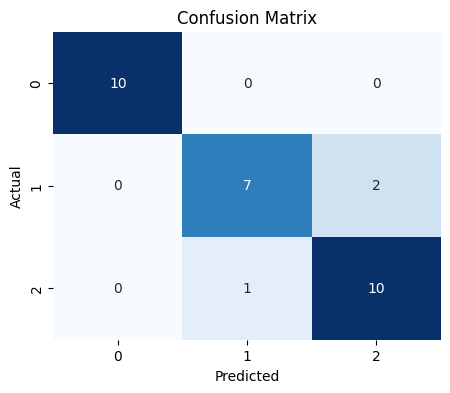

In [60]:
print(f"Classification Report:\n {classification_report(y_test2, y_pred2)}")

cm2 = confusion_matrix(y_test2, y_pred2)

plt.figure(figsize=(5,4))
sns.heatmap(cm2, annot=True, fmt='d' ,cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()